In [22]:
import numpy as np
import os, shutil
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
import torch.nn as nn

from MusicData import MusicData

# input parameters
x_len = 80
y_len = 40
batch_size = 32
n_samples = 4096
# LSTM parameters
num_layers = 2
lstm_size = [50, 100]
# training parameters
dropout_prob = 0.2
num_epochs = 100
epoch_size = 4096
verbose = True
display_interval = 500
moving_avg_length = 100

# fix random seed for reproducibility
np.random.seed(7)

## Load data

Sample rate: 44100


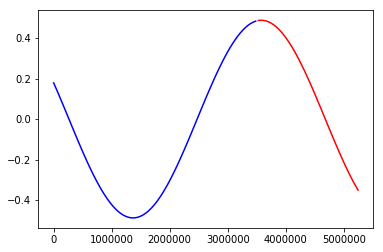

In [19]:
# filelist = ['a2002011001-e02.wav']
filelist = ['sine.wav']
music_data = MusicData(filelist, x_len, y_len)
x_ex, y_ex = music_data.__getitem__(0)

print('Sample rate: {}'.format(music_data.sample_rate))
x_duration = music_data.sample_rate * len(x_ex)
x = np.linspace(0, x_duration, len(x_ex), endpoint=False)
y_duration = music_data.sample_rate * len(y_ex) + x_duration
y = np.linspace(x_duration, y_duration, len(y_ex), endpoint=False)

plt.plot(x, x_ex, 'b')
plt.plot(y, y_ex, 'r')
plt.show()

## Make DataLoader

In [21]:
dataloader = DataLoader(music_data, batch_size=4, shuffle=True, num_workers=4)

## Build model

In [ ]:
class MusicRNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.LSTM(x_len, y_len, num_layers=num_layers, dropout=dropout_prob)